In [1]:
#Import all the necessary packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import statsmodels
from statsmodels.tsa.stattools import adfuller

#from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 15,6

/home/sdi/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# this is for 
#1. checking the dataframe values
#2. Feed the delimiter character to the 
#3. Assignt the values under columns

df1= pd.read_csv("/home/sdi/cpu-24.txt",sep = ';',names = ["Timeframe","Symbol","Metric"])
# Take only one VM as of now as it disturbs the order of the timeseries.
df2 = df1.loc[lambda df: df.Symbol== 'vmy2954']
#Drop Symbol column as it doesn't really matter anymore since we filtered out only one VM
df3 = df2.drop('Symbol',axis=1)



In [3]:
# This cell would follow blog closely. "DF3"
#Getting a feel of data we have
df3.head()
df3.dtypes

Timeframe     object
Metric       float64
dtype: object

In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
df = pd.read_csv("/home/sdi/cpu-24.txt",sep = ";",names = ["TimeFrame","Symbol","Metric"],index_col='TimeFrame',date_parser=dateparse)
#convert the time column in datetime format
df4 = df.loc[lambda df: df.Symbol== 'vmy2954']
df4 = df4.drop('Symbol',axis=1)
df4

,Metric
TimeFrame,
2018-02-12 14:42:28,26.87
2018-02-12 14:42:39,24.38
2018-02-12 14:42:50,34.67
2018-02-12 14:43:01,32.50
2018-02-12 14:43:12,48.24
2018-02-12 14:43:23,64.82
2018-02-12 14:43:34,73.13
2018-02-12 14:43:45,69.65
2018-02-12 14:43:56,69.35


In [5]:
dates = pd.date_range('2018-02-12','2018-02-14', freq = '10S')
dates


DatetimeIndex(['2018-02-12 00:00:00', '2018-02-12 00:00:10',
               '2018-02-12 00:00:20', '2018-02-12 00:00:30',
               '2018-02-12 00:00:40', '2018-02-12 00:00:50',
               '2018-02-12 00:01:00', '2018-02-12 00:01:10',
               '2018-02-12 00:01:20', '2018-02-12 00:01:30',
               ...
               '2018-02-13 23:58:30', '2018-02-13 23:58:40',
               '2018-02-13 23:58:50', '2018-02-13 23:59:00',
               '2018-02-13 23:59:10', '2018-02-13 23:59:20',
               '2018-02-13 23:59:30', '2018-02-13 23:59:40',
               '2018-02-13 23:59:50', '2018-02-14 00:00:00'],
              dtype='datetime64[ns]', length=17281, freq='10S')

In [6]:
ts= df4['Metric']
ts

TimeFrame
2018-02-12 14:42:28     26.87
2018-02-12 14:42:39     24.38
2018-02-12 14:42:50     34.67
2018-02-12 14:43:01     32.50
2018-02-12 14:43:12     48.24
2018-02-12 14:43:23     64.82
2018-02-12 14:43:34     73.13
2018-02-12 14:43:45     69.65
2018-02-12 14:43:56     69.35
2018-02-12 14:44:07     63.00
2018-02-12 14:44:18    100.00
2018-02-12 14:44:29    100.00
2018-02-12 14:44:40     70.65
2018-02-12 14:44:51    100.00
2018-02-12 14:45:02     99.50
2018-02-12 14:45:13     18.41
2018-02-12 14:45:24     19.50
2018-02-12 14:45:35     21.00
2018-02-12 14:45:46     23.00
2018-02-12 14:45:57     18.09
2018-02-12 14:46:08     17.00
2018-02-12 14:46:20     45.77
2018-02-12 14:46:31     53.00
2018-02-12 14:46:42     56.78
2018-02-12 14:46:53     52.00
2018-02-12 14:47:04     56.72
2018-02-12 14:47:15     68.50
2018-02-12 14:47:26     69.15
2018-02-12 14:47:37     96.00
2018-02-12 14:47:48     69.00
                        ...  
2018-02-13 14:59:41     12.94
2018-02-13 14:59:52     10.45


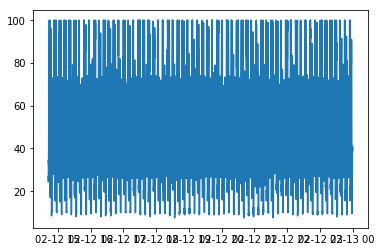

In [7]:
plt.plot(ts['2018-02-12'])

In [8]:
#groupby the symbol column and find the count


#df['Symbol'] = df['Symbol'].astype('str')
#Finding the data type - In pandas string is defined as object

df4.head()



,Metric
TimeFrame,
2018-02-12 14:42:28,26.87
2018-02-12 14:42:39,24.38
2018-02-12 14:42:50,34.67
2018-02-12 14:43:01,32.50
2018-02-12 14:43:12,48.24


In [79]:
#Divide into train and test dataset.
train = df4[0:6000]
test = df4[6000:]
#Take a sample based on indexed timeframe column every 20 min and take mean of it
df5 = df4.resample('20Min').mean()
train = train.resample('20Min').mean()
test = test.resample('20Min').mean()
test

,Metric
TimeFrame,
2018-02-13 09:00:00,48.622805
2018-02-13 09:20:00,48.864862
2018-02-13 09:40:00,50.656881
2018-02-13 10:00:00,50.379167
2018-02-13 10:20:00,49.475229
2018-02-13 10:40:00,50.186697
2018-02-13 11:00:00,52.827431
2018-02-13 11:20:00,48.891743
2018-02-13 11:40:00,50.398716


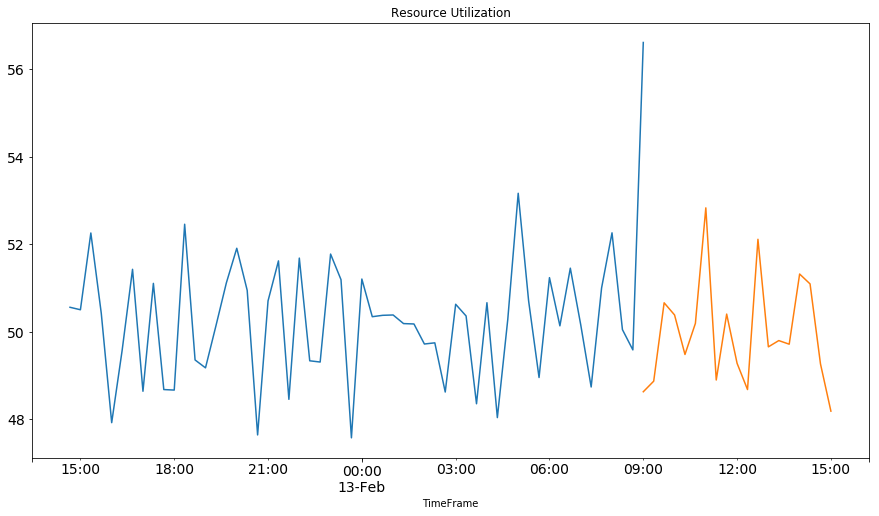

In [80]:
#Visualization of the data
#df5.plot(colormap=cm.jet)

# Visualization of train and test data
train.Metric.plot(figsize=(15,8), title= 'Resource Utilization', fontsize=14)
test.Metric.plot(figsize=(15,8), title= 'Resource Utilization', fontsize=14)
plt.show()

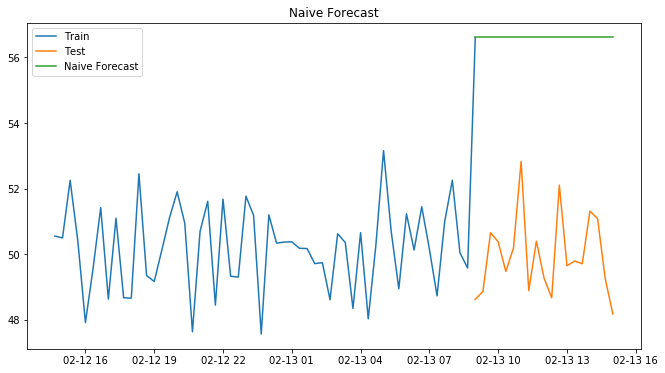

In [81]:
#Trying out few approaches of forecasting
# 1. naive
# 2.Moving Average
# 3. Average
# 4. Exponential Smoothing


dd = np.asarray(train.Metric)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(11,6))
plt.plot(train.index, train['Metric'], label='Train')
plt.plot(test.index,test['Metric'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()




In [82]:
#Calculate RMSE to check accuracy of the model


from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Metric, y_hat.naive))
print(rms)

6.7493985533443235


Low RMSE is generally good but significatly low value of RMSE is not relevant. naive forecast is good for stationary dataset. We have non stationary dataset here as in no constant increase or decrease.

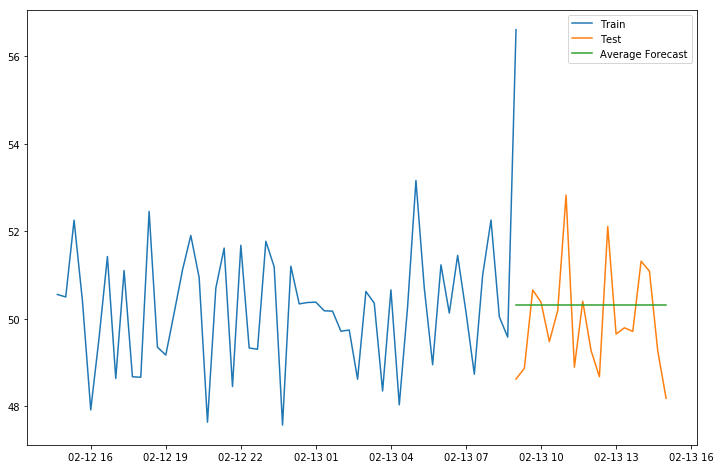

In [83]:
#Average Forecast
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Metric'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Metric'], label='Train')
plt.plot(test['Metric'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [84]:
rms = sqrt(mean_squared_error(test.Metric, y_hat_avg.avg_forecast))
print(rms)


1.2429911762599415


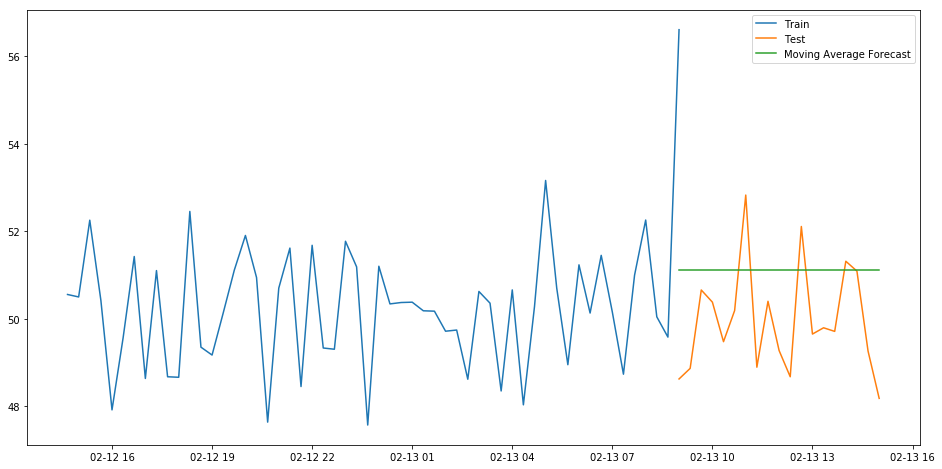

In [85]:
#Moving Average
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Metric'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Metric'], label='Train')
plt.plot(test['Metric'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()


In [112]:
# We dont see stationarity in our data so we will first check about it and then do some statistical tests.

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='cyan', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/home/sdi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  
/home/sdi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  import sys


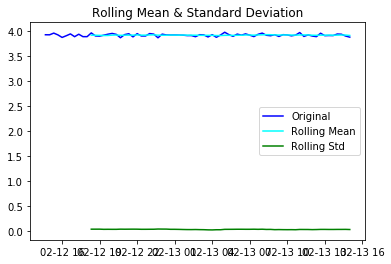

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [124]:
df5_log = np.log(df5)
df5_log.head()

test_stationarity(df5_log)

# Moving Average
In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series.

/home/sdi/.local/lib/python3.5/site-packages/pandas/core/generic.py:7067: FutureWarning: The freq kw is deprecated and will be removed in a future version. You can resample prior to passing to a window function
  on=on, axis=axis, closed=closed)
/home/sdi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,freq=20Min,center=False).mean()
  """Entry point for launching an IPython kernel.


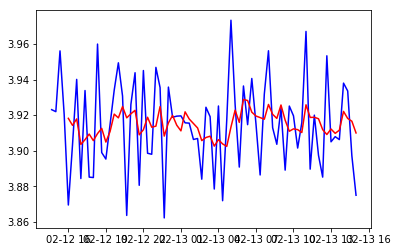

In [114]:
moving_avg = pd.rolling_mean(df5_log,5,freq = "20Min") #rolling_mean(arg,number of observations, frequency)
plt.plot(df5_log,color = 'blue')
plt.plot(moving_avg, color='red')

In [115]:
df5_log_moving_avg_diff = df5_log - moving_avg
df5_log_moving_avg_diff.head(20)

,Metric
TimeFrame,
2018-02-12 14:40:00,NaN
2018-02-12 15:00:00,NaN
2018-02-12 15:20:00,NaN
2018-02-12 15:40:00,NaN
2018-02-12 16:00:00,-0.048727
2018-02-12 16:20:00,-0.010940
2018-02-12 16:40:00,0.022223
2018-02-12 17:00:00,-0.019171
2018-02-12 17:20:00,0.027617


/home/sdi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  
/home/sdi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  import sys


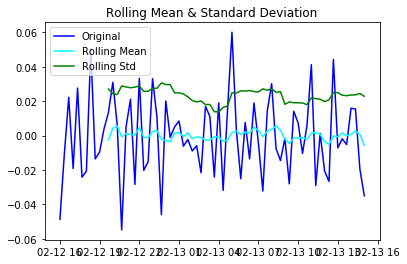

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [116]:
# Moving average has a problem that it may be difficult to find a fixed time frame and hence we need to take weighted average approach



df5_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(df5_log_moving_avg_diff)


# A ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor.

/home/sdi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(halflife=12,ignore_na=False,freq=20Min,adjust=True,min_periods=0).mean()
  """Entry point for launching an IPython kernel.


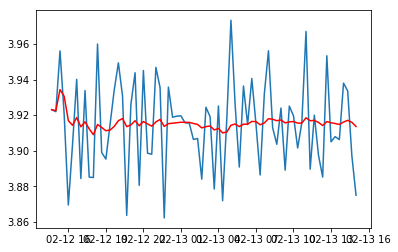

In [117]:
expwighted_avg = pd.ewma(df5_log,halflife = 12, freq = "20Min")
plt.plot(df5_log)
plt.plot(expwighted_avg, color='red')

/home/sdi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  
/home/sdi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  import sys


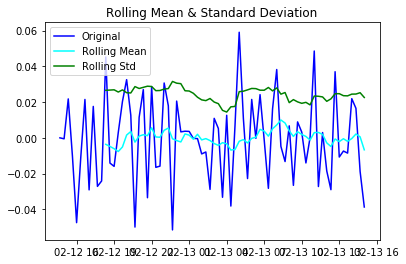

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [118]:
df5_log_ewma_diff = df5_log - expwighted_avg
test_stationarity(df5_log_ewma_diff)

In [ ]:
#Estimating Trend and Seasonlaity :
 #    1. Differencing
    
    
    

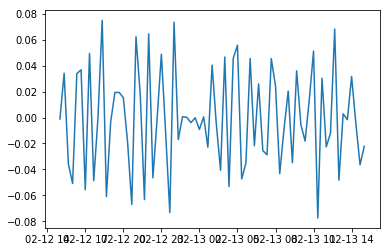

In [119]:
df5_log_diff = df5_log - df5_log.shift()
plt.plot(df5_log_diff)

/home/sdi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  
/home/sdi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  import sys


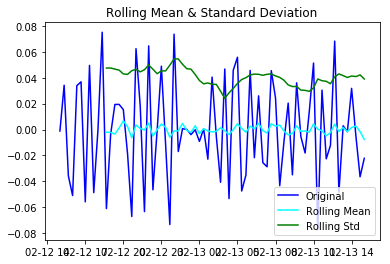

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [126]:
#Has this reduced trend ?

df5_log_diff.dropna(inplace=True)
test_stationarity(df5_log_diff)

In [128]:
#Auto Correlation function to determine the value of p,d,q in ARIMA
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df5_log_diff, nlags=20)
lag_pacf = pacf(df5_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

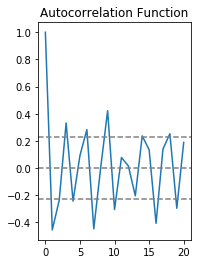

In [130]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df5_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df5_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

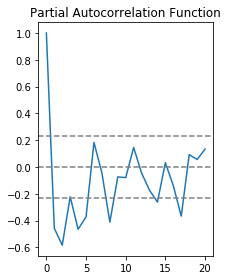

In [131]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df5_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df5_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# ARIMA